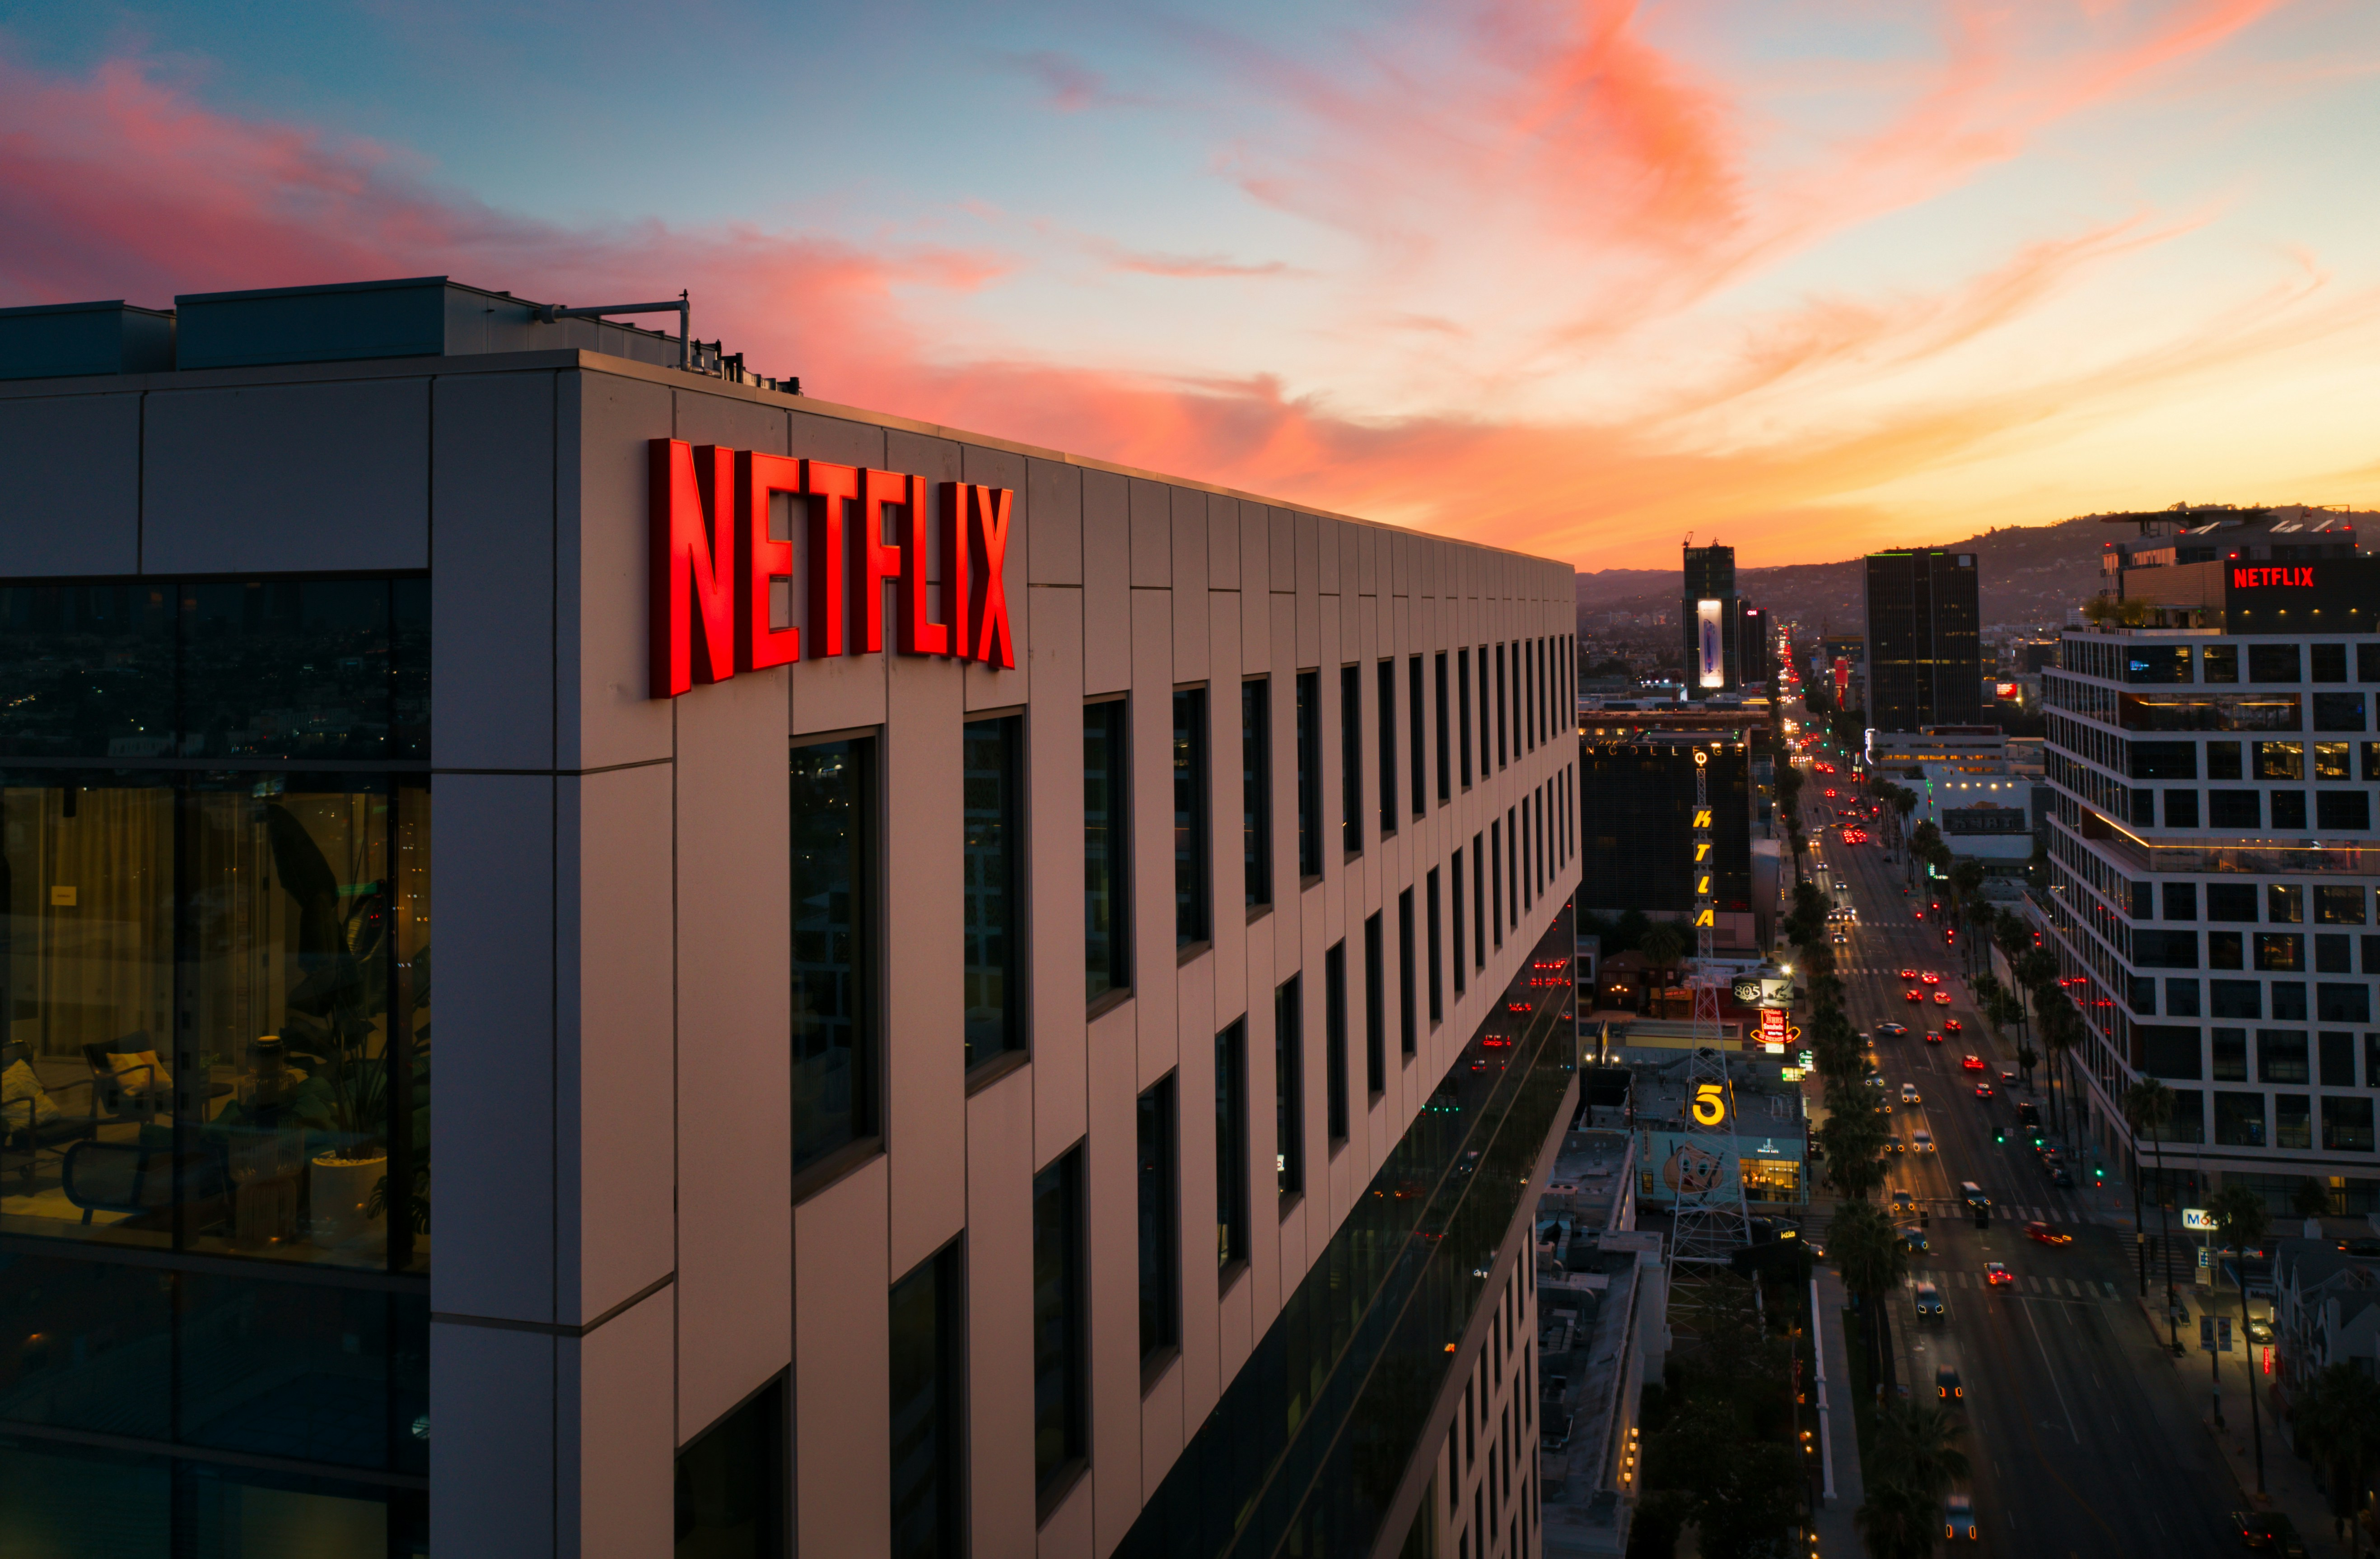

# Business Problem
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

# Netflix Dataset

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description

# Objectives of the Project

* Perform EDA on the given dataset and find insights.
* Provide Useful Insights and Business recommendations that can help the business to grow.

# 1. Importing Libraries , Loading the data and Basic Observations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1OKMUxOsoW5VCZILYPhm8sRog9g8T_PlA

Downloading...
From: https://drive.google.com/uc?id=1OKMUxOsoW5VCZILYPhm8sRog9g8T_PlA
To: /content/netflix_case_study.csv
100% 3.40M/3.40M [00:00<00:00, 184MB/s]


In [ ]:
data = pd.read_csv('netflix_case_study.csv')
df = data.copy()
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

These are the first 5 rows of the dataset. The actual size of the dataset is given below. total 8807 rows and 12 columns.

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

These are total features of our dataset. It is seen that show_id column has all unique values,
Title column has all unique values i.e. total 8807 which equates with total rows in the dataset.
Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

In [ ]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Only single column having numerical values. It gives idea of release year of the content ranges between what timeframe.
Rest all the columns are having categorical data.

In [ ]:
df.describe(include='object')

show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   

              country       date_added rating  duration  \
count            7976             8797   8803      8804   
unique            748             1767     17       220   
top     United States  January 1, 2020  TV-MA  1 Season   
freq             2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

# 2. Data Cleaning

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['duration'].isna()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

* 3 missing values are found in duration column , and it is also found that by mistake those data got entered in rating column

In [ ]:
ind = df[df['duration'].isna()].index
ind

Index([5541, 5794, 5813], dtype='int64')

In [ ]:
df.loc[ind]= df[df['duration'].isna()].fillna(method = 'ffill' , axis = 1)
df.loc[ind]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017         2017  74 min   
5794  Louis C.K.  United States  September 16, 2016         2010  84 min   
5813  Louis C.K.  United States     August 15, 2016         2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

In [ ]:
df.loc[ind ,'rating']= None

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', None, 'NR', nan, 'TV-Y7-FV', 'UR'],
      dtype=object)

In rating column , NR (Not rated) is same as UR (Unrated). lets change UR to NR.

In [ ]:
df.loc[df['rating']=='UR','rating']='NR'
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            83
G             41
TV-Y7-FV       6
NC-17          3
Name: count, dtype: int64

* dropped the null from date_added column

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

In [ ]:
df['date_added'].value_counts()

date_added
January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 2, 2017        1
September 11, 2019      1
May 17, 2015            1
June 5, 2018            1
October 14, 2017        1
Name: count, Length: 1767, dtype: int64

For 'date_added' column, all values confirm to string type, So we can convert its data type from object to datetime

In [ ]:
inx=df[pd.to_datetime(df['date_added'],errors='coerce').isna()].index

In [ ]:
df.loc[inx,'date_added']=pd.to_datetime(df.loc[inx,'date_added'])


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

We can add the new column 'year_added' by extracting the year from 'date_added' column

In [ ]:
df['year_added']=df['date_added'].dt.year

Similar way, We can add the new column 'month_added' by extracting the month from 'date_added' column

In [ ]:
df['month_added'] = df['date_added'].dt.month

In [ ]:
df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 464.2 KB


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

% Null values in each column

In [ ]:
round((df.isna().sum()/ df.shape[0])*100)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
year_added       0.0
month_added      0.0
dtype: float64

We can see that, after cleaning some data we still have null values in 3 columns. These are much higher in numbers.

For some content - country is missing. (9%)

for some content - director names are missing (30%)

for some content - cast is missing (9%)

In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

Missing values in the 'director', 'cast', and 'country' columns were filled with 'Unknown', while missing values in the 'rating' column were replaced with 'Not Rated'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   object        
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int32         
 13  month_added   8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(11)
memory usage: 1.2+ MB


# 3. Data Exploration and Non Graphical Analysis

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

2 types of content present in dataset - either Movie or TV Show

In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.duration.value_counts()

duration
90 min     152
97 min     146
94 min     146
93 min     146
91 min     144
          ... 
228 min      1
18 min       1
205 min      1
201 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [ ]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
12 Seasons       2
15 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

Since movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons

In [ ]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

In [ ]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [ ]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [ ]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2666, dtype: float64

In [ ]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

when was first tv shows added on netflix and when is the most recent tv shows added on netflix as per data i.e. dataset duration

In [ ]:
timeperiod = pd.Series((tv_shows['date_added'].min().strftime('%B %Y') , tv_shows['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

first           February 2008
Most Recent    September 2021
dtype: object

when was first movie added on netflix and when is the most recent movie added on netflix as per data i.e. dataset duration

In [ ]:
timeperiod = pd.Series((movies['date_added'].min().strftime('%B %Y') , movies['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

first            January 2008
Most Recent    September 2021
dtype: object

In [ ]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

The oldest and the most recent movie/TV show released on the Netflix in which year?

In [ ]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

show_id     type                                        title  \
4250   s4251  TV Show            Pioneers: First Women Filmmakers*   
966     s967    Movie                                Get the Grift   
967     s968  TV Show                     Headspace Guide to Sleep   
968     s969  TV Show                                       Sexify   
972     s973  TV Show                                        Fatma   
...      ...      ...                                          ...   
466     s467  TV Show                           My Unorthodox Life   
467     s468    Movie  Private Network: Who Killed Manuel Buendía?   
468     s469    Movie              The Guide to the Perfect Family   
471     s472    Movie                               Day of Destiny   
8437   s8438  TV Show                       The Netflix Afterparty   

                    director  \
4250                 Unknown   
966            Pedro Antonio   
967                  Unknown   
968                  Unknown   
972                  Unknown   
...                      ...   
466                  Unknown   
467            Manuel Alcalá   
468            Ricardo Trogi   
471   Akay Mason, Abosi Ogba   
8437                 Unknown   

                                                   cast        country  \
4250                                            Unknown        Unknown   
966   Marcus Majella, Samantha Schmütz, Caito Mainie...         Brazil   
967                                 Evelyn Lewis Prieto        Unknown   
968   Aleksandra Skraba, Maria Sobocińska, Sandra Dr...         Poland   
972   Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...         Turkey   
...                                                 ...            ...   
466                                             Unknown        Unknown   
467                                Daniel Giménez Cacho        Unknown   
468   Louis Morissette, Émilie Bierre, Catherine Cha...        Unknown   
471   Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...        Unknown   
8437       David Spade, London Hughes, Fortune Feimster  United States   

     date_added release_year rating  duration  \
4250 2018-12-30         1925  TV-14  1 Season   
966  2021-04-28         2021  TV-MA    95 min   
967  2021-04-28         2021   TV-G  1 Season   
968  2021-04-28         2021  TV-MA  1 Season   
972  2021-04-27         2021  TV-MA  1 Season   
...         ...          ...    ...       ...   
466  2021-07-14         2021  TV-MA  1 Season   
467  2021-07-14         2021  TV-MA   100 min   
468  2021-07-14         2021  TV-MA   102 min   
471  2021-07-13         2021  TV-PG   110 min   
8437 2021-01-02         2021  TV-MA  1 Season   

                                              listed_in  \
4250                                           TV Shows   
966                      Comedies, International Movies   
967                     Docuseries, Science & Nature TV   
968      International TV Shows, TV Comedies, TV Dramas   
972     International TV Shows, TV Dramas, TV Thrillers   
...                                                 ...   
466                                          Reality TV   
467                 Documentaries, International Movies   
468              Comedies, Dramas, International Movies   
471   Children & Family Movies, Dramas, Internationa...   
8437          Stand-Up Comedy & Talk Shows, TV Comedies   

                                            description  year_added  \
4250  This collection restores films from women who ...        2018   
966   After a botched scam, Clóvis bumps into Lohane...        2021   
967   Learn how to sleep better with Headspace. Each...        2021   
968   To build an innovative sex app and win a tech ...        2021   
972   Reeling from tragedy, a nondescript house clea...        2021   
...                                                 ...         ...   
466   Follow Julia Haart, Elite World Group CEO and ...        2021   
467   A deep dive into t

Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.

In [ ]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating   
Movie    G              41
         NC-17           3
         NR             78
         Not Rated       5
         PG            287
         PG-13         490
         R             797
         TV-14        1427
         TV-G          126
         TV-MA        2062
         TV-PG         540
         TV-Y          131
         TV-Y7         139
         TV-Y7-FV        5
TV Show  NR              4
         Not Rated       2
         R               2
         TV-14         730
         TV-G           94
         TV-MA        1143
         TV-PG         321
         TV-Y          175
         TV-Y7         194
         TV-Y7-FV        1
Name: show_id, dtype: int64

Working on the columns having maximum null values and the columns having comma separated multiple values for each record



*   Country Column


In [ ]:
df['country'].value_counts()

country
United States                                             2812
India                                                      972
Unknown                                                    830
United Kingdom                                             418
Japan                                                      244
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country column into different rows.

we are Creating a separate table for country , to avoid the duplicasy of records in our origional table after exploding.

In [ ]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb['country'] = country_tb['country'].str.split(',')
country_tb = country_tb.explode('country')
country_tb

show_id     type        country
0         s1    Movie  United States
1         s2  TV Show   South Africa
2         s3  TV Show        Unknown
3         s4  TV Show        Unknown
4         s5  TV Show          India
...      ...      ...            ...
8802   s8803    Movie  United States
8803   s8804  TV Show        Unknown
8804   s8805    Movie  United States
8805   s8806    Movie  United States
8806   s8807    Movie          India

[10840 rows x 3 columns]

In [ ]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_tb['country'] = country_tb['country'].str.strip()

In [ ]:
country_tb.loc[country_tb['country'] == '']

show_id     type country
193     s194  TV Show        
365     s366    Movie        
1192   s1193    Movie        
2224   s2225    Movie        
4653   s4654    Movie        
5925   s5926    Movie        
7007   s7008    Movie

In [ ]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [ ]:
country_tb['country'].nunique()

123

Netflix has movies from the total 122 countries and 1 Unknown.

  Total movies and tv shows in each country

In [ ]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type             Movie  TV Show
country                        
United States   2752.0    932.0
India            962.0     84.0
United Kingdom   534.0    271.0
Unknown          440.0    390.0
Canada           319.0    126.0
...                ...      ...
Azerbaijan         NaN      1.0
Belarus            NaN      1.0
Cuba               NaN      1.0
Cyprus             NaN      1.0
Puerto Rico        NaN      1.0

[123 rows x 2 columns]



*   Director column



In [ ]:
df['director'].value_counts()

director
Unknown                                   2624
Rajiv Chilaka                               19
Raúl Campos, Jan Suter                      18
Suhas Kadav                                 16
Marcus Raboy                                16
                                          ... 
Milla Harrison-Hansley, Alicky Sussman       1
Drew Stone                                   1
Benjamin Turner                              1
S. Shankar                                   1
Peter Hewitt                                 1
Name: count, Length: 4529, dtype: int64

There are some movies which are directed by multiple directors. Hence multiple names of directors are given in comma separated format.
We will explode the director column as well. It will create many duplicate records in originaltable hence we created separate table for directors.

In [ ]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb['director'] = dir_tb['director'].str.split(',')
dir_tb

show_id     type           director
0         s1    Movie  [Kirsten Johnson]
1         s2  TV Show          [Unknown]
2         s3  TV Show  [Julien Leclercq]
3         s4  TV Show          [Unknown]
4         s5  TV Show          [Unknown]
...      ...      ...                ...
8802   s8803    Movie    [David Fincher]
8803   s8804  TV Show          [Unknown]
8804   s8805    Movie  [Ruben Fleischer]
8805   s8806    Movie     [Peter Hewitt]
8806   s8807    Movie      [Mozez Singh]

[8797 rows x 3 columns]

In [ ]:
dir_tb = dir_tb.explode('director')

In [ ]:
dir_tb['director'] = dir_tb['director'].str.strip()

In [ ]:
# checking if empty stirngs are there in director column
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

director
False    9602
Name: count, dtype: int64

In [ ]:
dir_tb

show_id     type         director
0         s1    Movie  Kirsten Johnson
1         s2  TV Show          Unknown
2         s3  TV Show  Julien Leclercq
3         s4  TV Show          Unknown
4         s5  TV Show          Unknown
...      ...      ...              ...
8802   s8803    Movie    David Fincher
8803   s8804  TV Show          Unknown
8804   s8805    Movie  Ruben Fleischer
8805   s8806    Movie     Peter Hewitt
8806   s8807    Movie      Mozez Singh

[9602 rows x 3 columns]

In [ ]:
dir_tb['director'].nunique()

4994

There are total 4993 unique directors  and 1 unknown in the dataset.

Total movies and tv shows directed by each director

* 'listed_in' column to understand more about genres



In [ ]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [ ]:
genre_tb['listed_in'] = genre_tb['listed_in'].str.split(',')
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()
genre_tb

show_id     type                 listed_in
0         s1    Movie             Documentaries
1         s2  TV Show    International TV Shows
1         s2  TV Show                 TV Dramas
1         s2  TV Show              TV Mysteries
2         s3  TV Show            Crime TV Shows
...      ...      ...                       ...
8805   s8806    Movie  Children & Family Movies
8805   s8806    Movie                  Comedies
8806   s8807    Movie                    Dramas
8806   s8807    Movie      International Movies
8806   s8807    Movie          Music & Musicals

[19303 rows x 3 columns]

In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

Total 42 genres present in dataset

In [ ]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

Movies have 20 genres and TV shows have 22 genres.

In [ ]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type                           Movie  TV Show
listed_in                                    
Action & Adventure             859.0      NaN
Anime Features                  71.0      NaN
Anime Series                     NaN    175.0
British TV Shows                 NaN    252.0
Children & Family Movies       641.0      NaN
Classic & Cult TV                NaN     26.0
Classic Movies                 116.0      NaN
Comedies                      1674.0      NaN
Crime TV Shows                   NaN    469.0
Cult Movies                     71.0      NaN
Documentaries                  869.0      NaN
Docuseries                       NaN    394.0
Dramas                        2427.0      NaN
Faith & Spirituality            65.0      NaN
Horror Movies                  357.0      NaN
Independent Movies             756.0      NaN
International Movies          2752.0      NaN
International TV Shows           NaN   1350.0
Kids' TV                         NaN    449.0
Korean TV Shows                  NaN    151.0
LGBTQ Movies                   102.0      NaN
Movies                          57.0      NaN
Music & Musicals               375.0      NaN
Reality TV                       NaN    255.0
Romantic Movies                616.0      NaN
Romantic TV Shows                NaN    370.0
Sci-Fi & Fantasy               243.0      NaN
Science & Nature TV              NaN     92.0
Spanish-Language TV Shows        NaN    173.0
Sports Movies                  219.0      NaN
Stand-Up Comedy                343.0      NaN
Stand-Up Comedy & Talk Shows     NaN     56.0
TV Action & Adventure            NaN    167.0
TV Comedies                      NaN    574.0
TV Dramas                        NaN    762.0
TV Horror                        NaN     75.0
TV Mysteries                     NaN     98.0
TV Sci-Fi & Fantasy              NaN     83.0
TV Shows                         NaN     16.0
TV Thrillers                     NaN     57.0
Teen TV Shows                    NaN     69.0
Thrillers                      577.0      NaN

 .



*   **Exploring cast column**




In [ ]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb['cast'] = cast_tb['cast'].str.split(',')
cast_tb = cast_tb.explode('cast')
cast_tb

show_id     type                    cast
0         s1    Movie                 Unknown
1         s2  TV Show              Ama Qamata
1         s2  TV Show             Khosi Ngema
1         s2  TV Show           Gail Mabalane
1         s2  TV Show          Thabang Molaba
...      ...      ...                     ...
8806   s8807    Movie        Manish Chaudhary
8806   s8807    Movie            Meghna Malik
8806   s8807    Movie           Malkeet Rauni
8806   s8807    Movie          Anita Shabdish
8806   s8807    Movie   Chittaranjan Tripathy

[64882 rows x 3 columns]

In [ ]:
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [ ]:
# checking empty strings
cast_tb[cast_tb['cast'] == '']

Empty DataFrame
Columns: [show_id, type, cast]
Index: []

In [ ]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36404

In [ ]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type              Movie  TV Show
cast                            
Unknown           475.0    350.0
Takahiro Sakurai    7.0     25.0
Yuki Kaji          10.0     19.0
Junichi Suwabe      4.0     17.0
Daisuke Ono         5.0     17.0
...                 ...      ...
Şerif Sezer         1.0      NaN
Şevket Çoruh        1.0      NaN
Şinasi Yurtsever    3.0      NaN
Şükran Ovalı        1.0      NaN
Ṣọpẹ́ Dìrísù        1.0      NaN

[36404 rows x 2 columns]

#  4. Visual Analysis - Univariate & Bivariate Analysis

4.1. Distribution of content across the different types

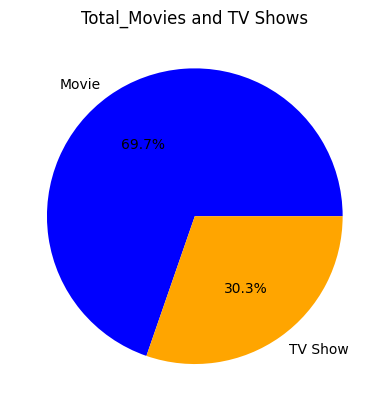

In [ ]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.

* 4.2 Distribution of 'date_added' column

 How has the number of movies/TV shows added on Netflix per year changed over the time?

In [ ]:
d = df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

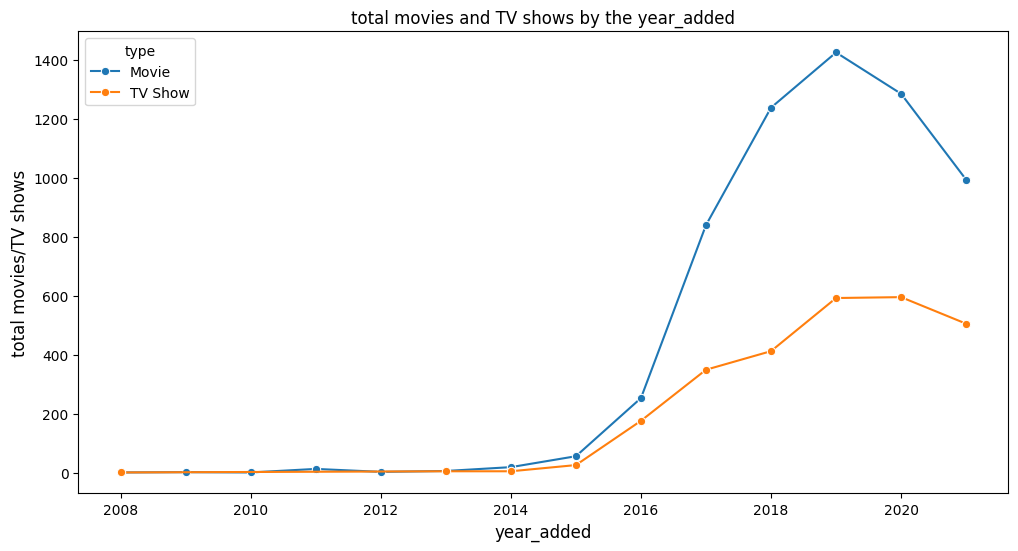

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the year_added' , fontsize = 12)
plt.show()

Observation:
   * The content added on the Netflix surged drastically after 2015.
   * 2019 marks the highest number of movies and TV shows added on the Netflix.
   * Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic.
    But still , TV shows content have not dropped as drastic as movies. In recent years TV shows are focussed more than Movies.
    

* 4.3 Distribution of 'Release_year' column

How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

type  release_year  total movies/TV shows
0      Movie          1942                      2
1      Movie          1943                      3
2      Movie          1944                      3
3      Movie          1945                      3
4      Movie          1946                      1
..       ...           ...                    ...
114  TV Show          2017                    265
115  TV Show          2018                    379
116  TV Show          2019                    397
117  TV Show          2020                    436
118  TV Show          2021                    315

[119 rows x 3 columns]

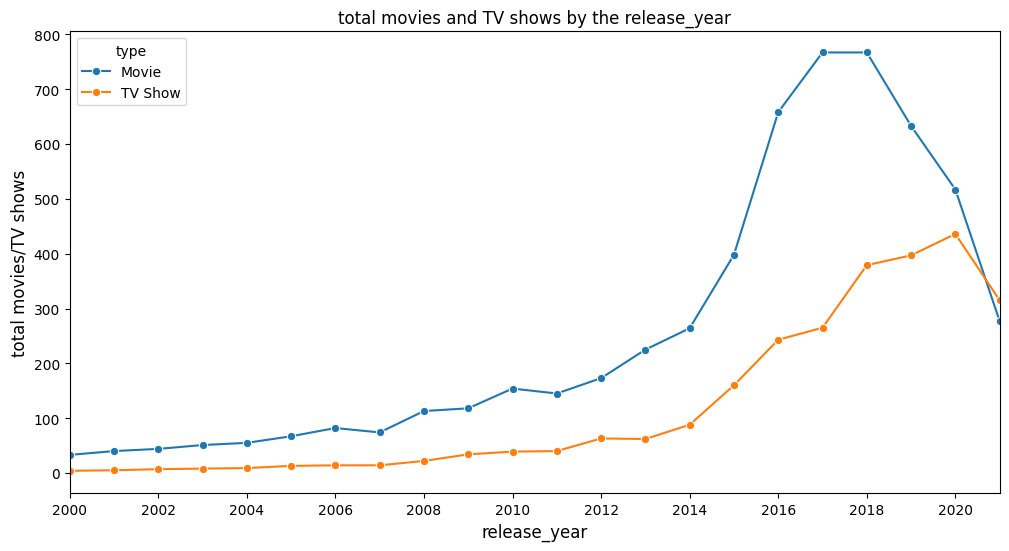

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

Observation:
   * 2018 marks the highest number of movie and TV show releases.
   * Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
   * In recent years TV shows are focussed more than Movies.
   * The yearly number of releases has surged drastically from 2015.

* 4.4  Total movies/TV shows by each director

In [ ]:
# total Movies directed by top 10 directors
dir_tb = dir_tb[~dir_tb['director'].str.strip().str.lower().eq('unknown')]
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]

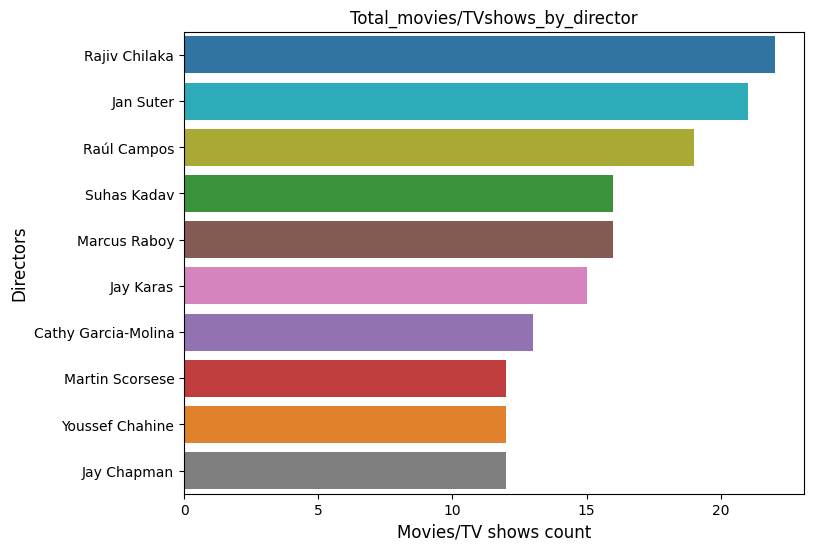

In [ ]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v', hue = 'director')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observation:
   * The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

* 4.5 Total movies/TV shows by each country

In [ ]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type            Movie  TV Show
country                       
United States    2752      932
India             962       84
United Kingdom    534      271
Unknown           440      390
Canada            319      126
France            303       90
Germany           182       44
Spain             171       61
Japan             119      198
South Korea        61      170

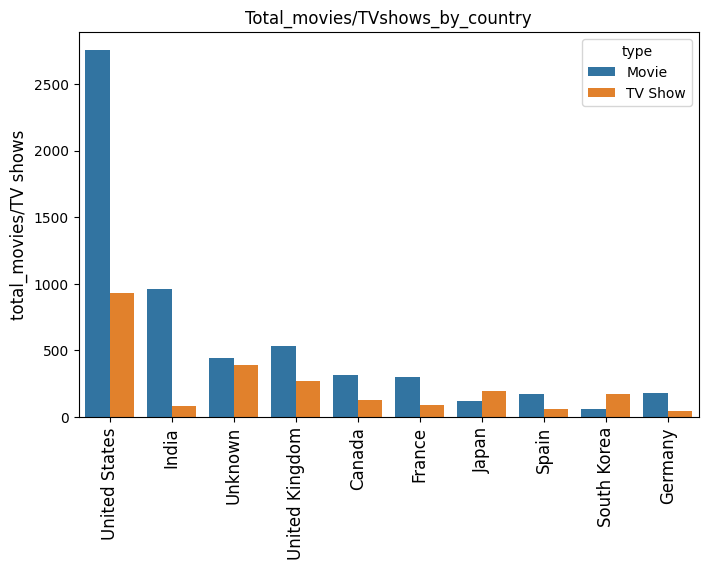

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [ ]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

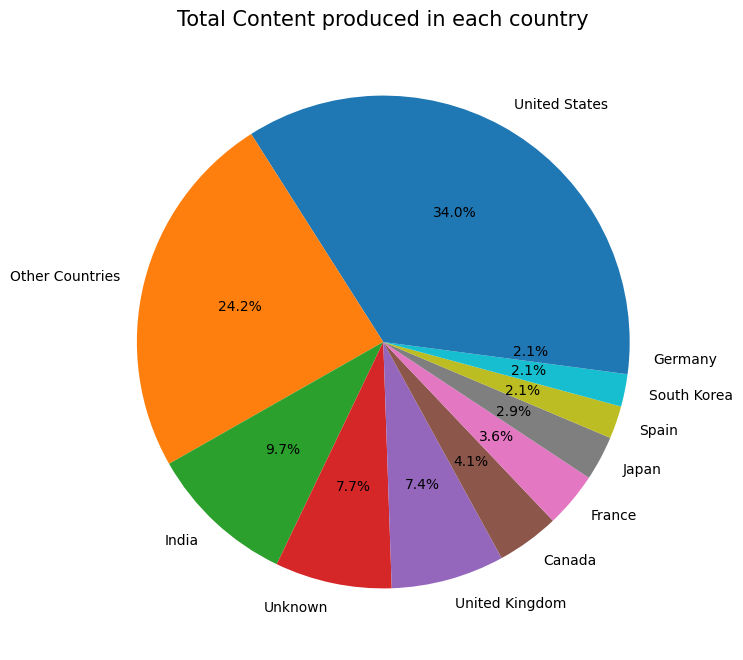

In [ ]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

* Observation:
    * United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
    * Maximum content of Netflix which is around 75% , is coming from these top 10 countries.  Rest of the world only contributes 25% of the content.

* 4.6 Total content distribution by release year of the content

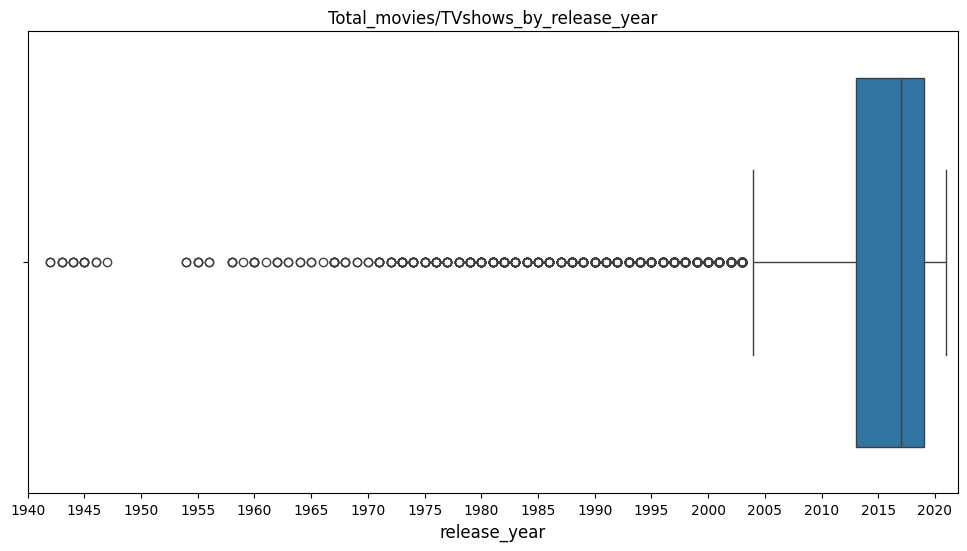

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

* Netflix have major content which is released in the year range 2000-2021
* It seems that the content older than year 2000 is almost missing from the Netflix.

* 4.7 Total movies/TV shows distribution by rating of the content

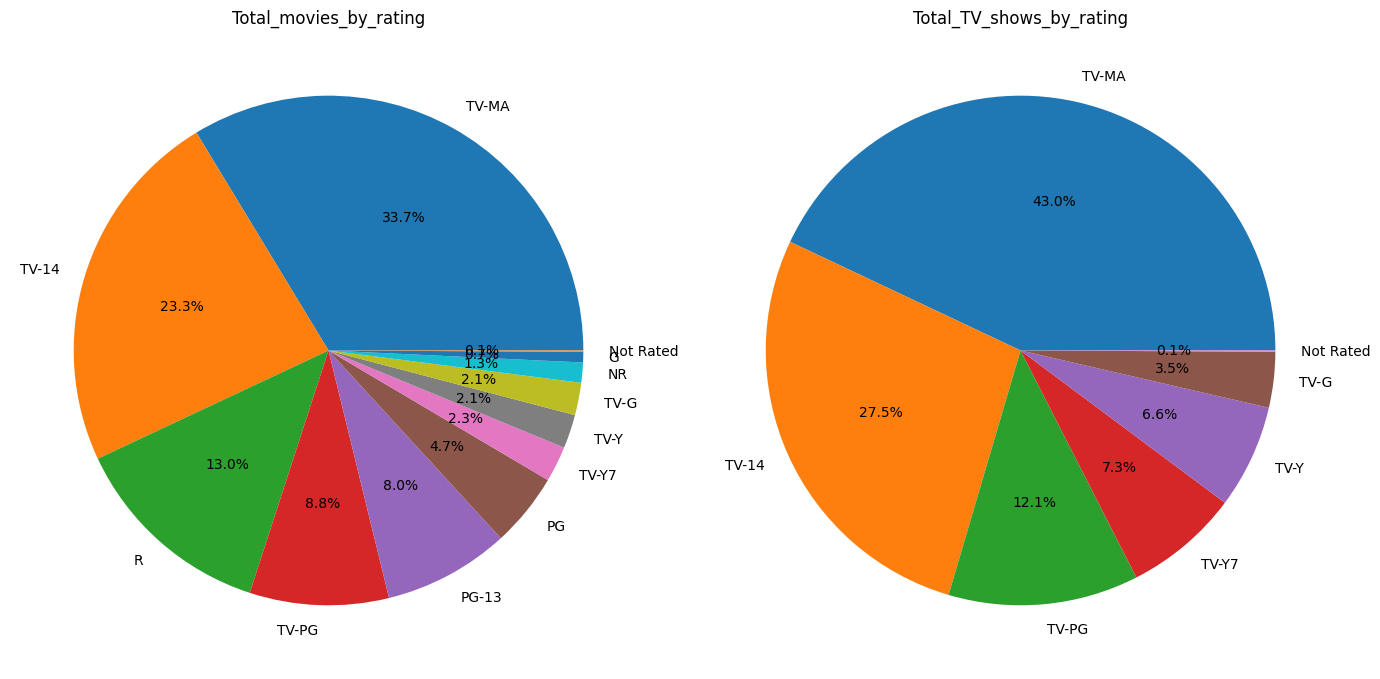

In [ ]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

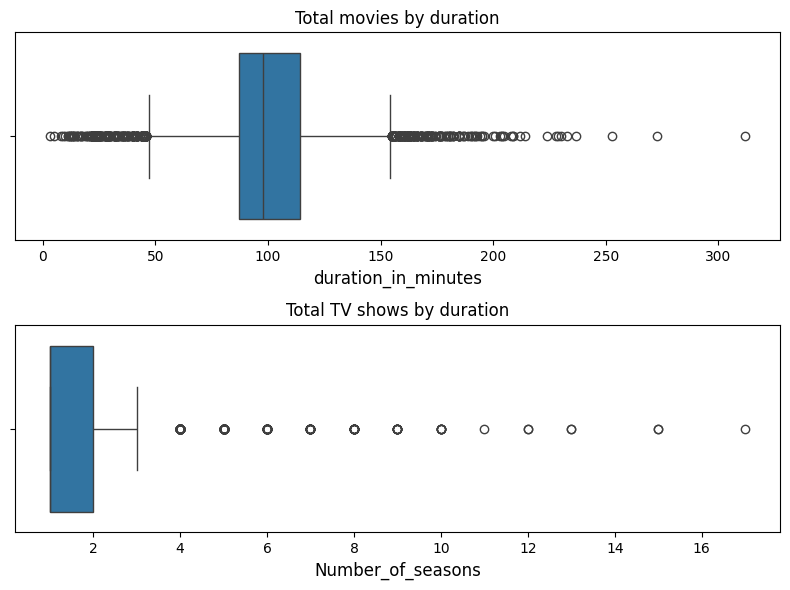

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

* Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)
* TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers

* 4.9  Total movies/TV shows in each Genre

In [ ]:
# Lets check the count for top 10 genres in Movies and TV_shows
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

In [ ]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

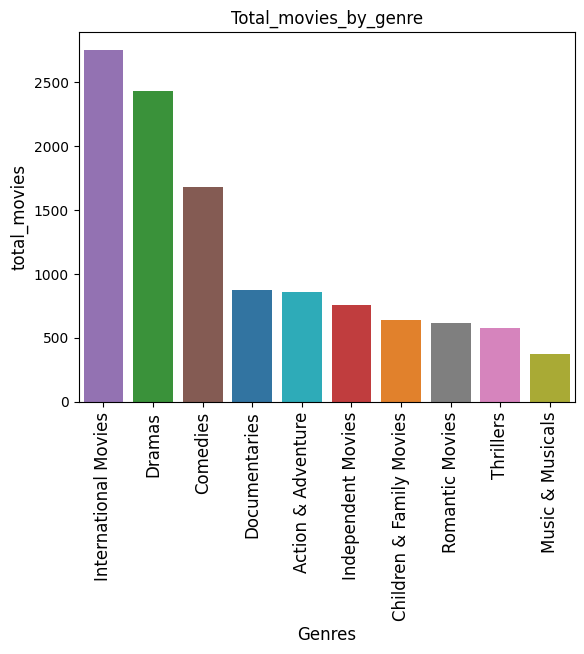

In [ ]:
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres, hue='listed_in')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

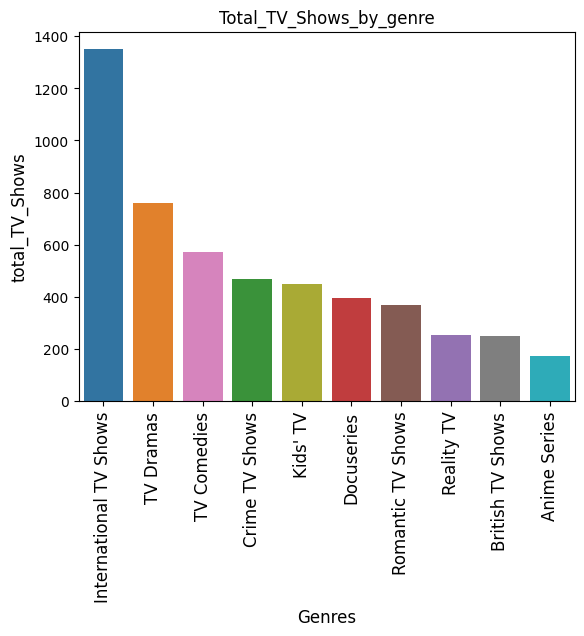

In [ ]:
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres,hue='listed_in')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

# 5. Bivariate Analysis

* 5.1  Lets check popular genres in top 20 countries

In [ ]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [ ]:
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

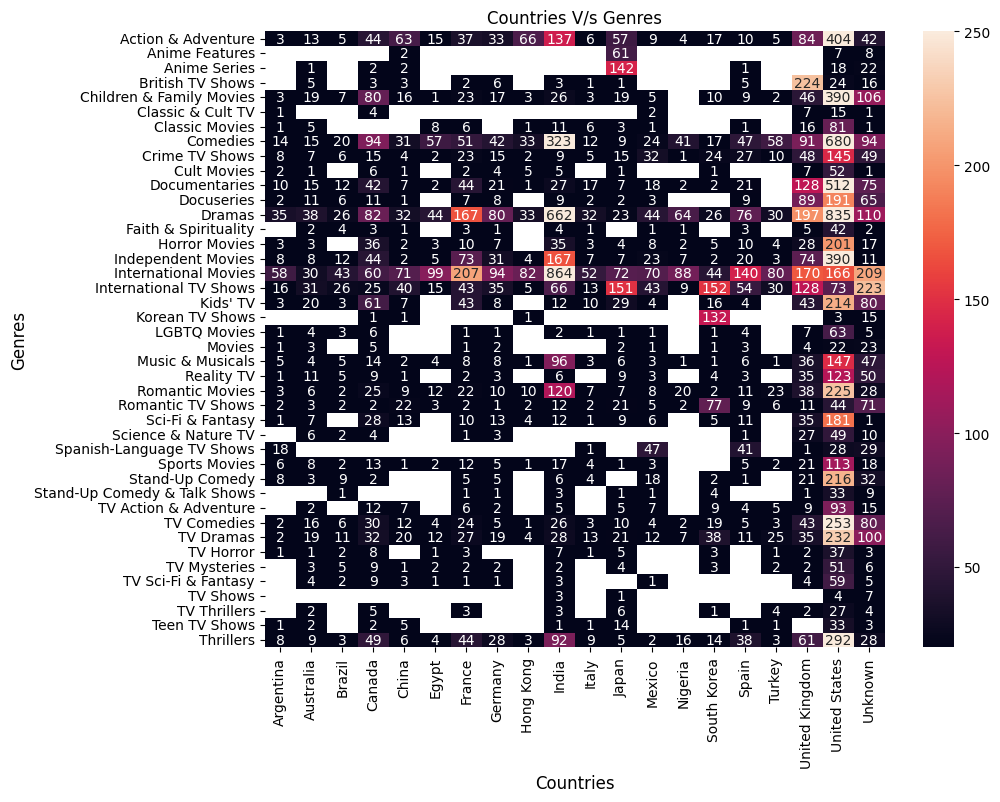

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

United States and UK have a good mix of almost all genres.

Maximum International movies are produced in India.

5.2 Country-wise Rating of Content

In [ ]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

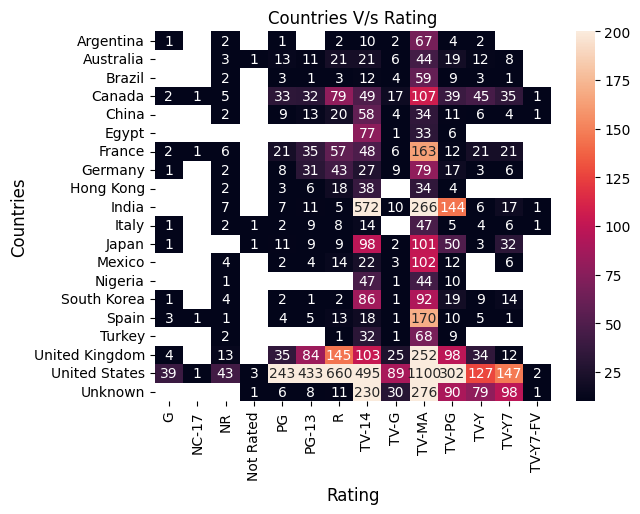

In [ ]:
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

* Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
* India also has many titles rated TV-PG, other than TV-MA & TV-14.
* Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
* There is scarce content for general audience (TV-G & G) across all countries except US.

* 5.3  The top actors by country

In [ ]:
cast_tb = cast_tb[~cast_tb['cast'].str.strip().str.lower().eq('unknown')]
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

country               cast  show_id
49405  United States        Tara Strong       22
48330  United States  Samuel L. Jackson       22
40463  United States    Fred Tatasciore       21
35733  United States       Adam Sandler       20
46429  United States       Nicolas Cage       19

In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)


In [1041]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors.head()

country               cast  show_id
0  United States        Tara Strong       22
1  United States  Samuel L. Jackson       22
2  United States    Fred Tatasciore       21
3  United States       Adam Sandler       20
4  United States       Nicolas Cage       19

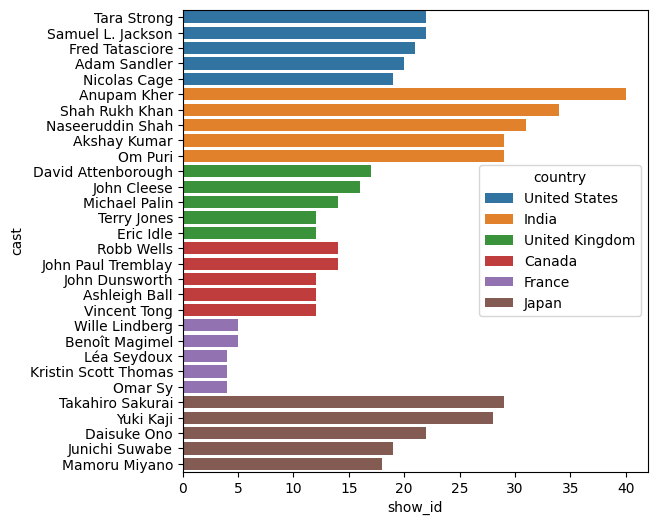

In [1042]:
plt.figure(figsize = (6,6))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')
plt.show()

* 5.4 Top 5 directors by Genre

In [1043]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']
x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()
top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir.head()

listed_in           director  show_id
147  Action & Adventure   Don Michael Paul        9
215  Action & Adventure     Hidenori Inoue        7
550  Action & Adventure     S.S. Rajamouli        7
651  Action & Adventure  Toshiya Shinohara        7
398  Action & Adventure                McG        5

* 5.5  Top 5 genres in each country

In [ ]:
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [1038]:
top_5_genre.head()

country                 listed_in  show_id
0  United States                    Dramas      835
1  United States                  Comedies      680
2  United States             Documentaries      512
3  United States        Action & Adventure      404
4  United States  Children & Family Movies      390

*  5.6  Variation in duration of movies by Release year

In [ ]:
movies['duration_in_minutes'].value_counts()

duration_in_minutes
90.0     152
97.0     146
94.0     146
93.0     146
91.0     144
        ... 
228.0      1
18.0       1
205.0      1
201.0      1
191.0      1
Name: count, Length: 205, dtype: int64

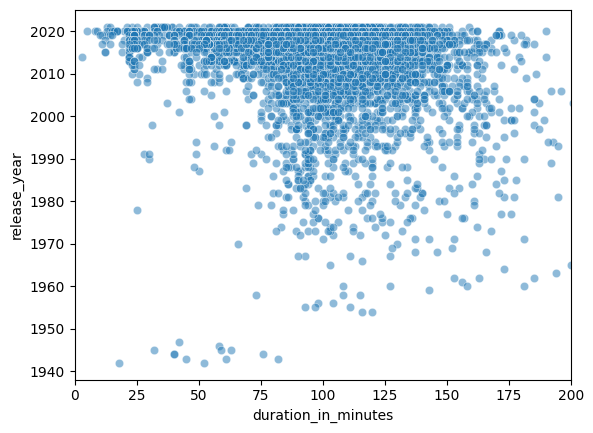

In [ ]:
sns.scatterplot(x=movies['duration_in_minutes'], y=movies['release_year'], alpha=0.5)
plt.xlim(0, 200)
plt.show()


* Observation
    * The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
    * There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

* 5.7  What is the best time of the year when maximum content get added on the Netflix?

In [ ]:
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

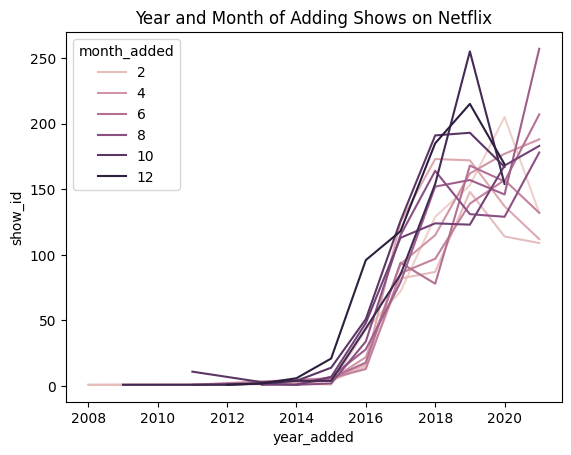

In [ ]:
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

* The number of shows getting added is increasing with each year until 2020.
* Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

* 5.8 Which countries are adding more number of content over the time?

In [ ]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']


In [ ]:
country_year_new = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

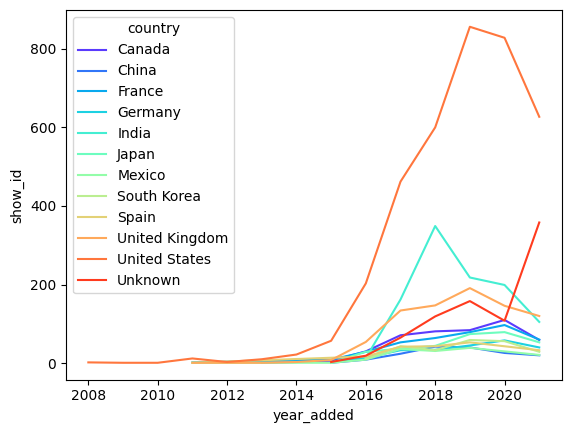

In [ ]:
sns.lineplot(data = country_year_new , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation :
United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

In [1039]:
country_year.head()

show_id        country     type  year_added
0      s1  United States    Movie        2021
1      s3        Unknown  TV Show        2021
2      s4        Unknown  TV Show        2021
3      s5          India  TV Show        2021
4      s6        Unknown  TV Show        2021

In [ ]:
movie_type = country_year.loc[country_year.type == 'Movie'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()
tv_type = country_year.loc[country_year.type == 'TV Show'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

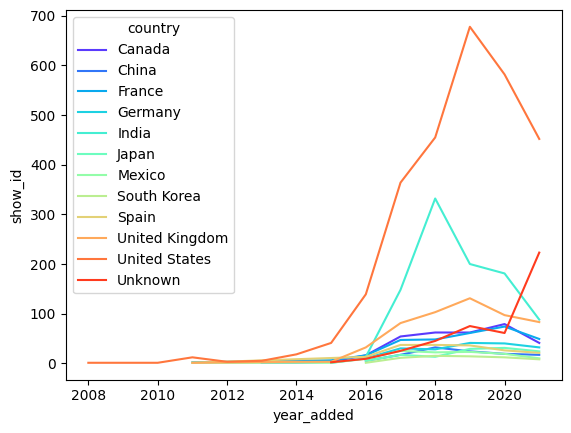

In [ ]:
sns.lineplot(data = movie_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

<Axes: xlabel='year_added', ylabel='show_id'>

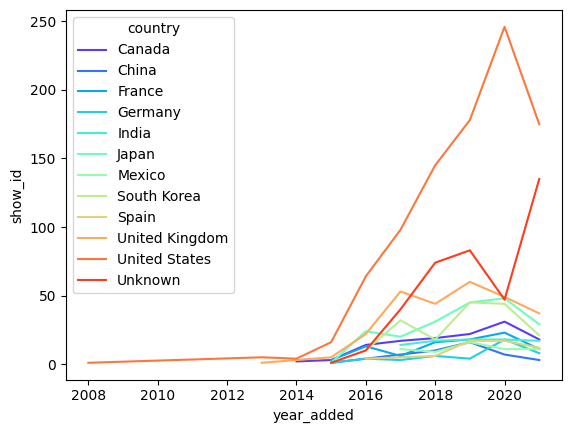

In [ ]:
sns.lineplot(data = tv_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation:
It is observed that United States tops in both movies and TV Shows. India is at 2nd positon in movies but In TV shows United Kingdom is at 2nd position, followed by India ,South Korea , Australia.
It shows in countries like United Kingdom , South Korea , Australia TV Shows popularity is rising more than movies

# Insights based on Non-Graphical and Visual Analysis

* Around 70% content on Netflix is Movies and around 30% content is TV shows.
* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
* Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly.  Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
* Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
* Netflix has movies from total 122 countries, United States being the highset contributor with almost 34% of all the content.
* The release year for shows is concentrated in the range 2005-2021.
* 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
* 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
* various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
* Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
* Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
*  Shorter duration movies have been popular in last 10 years.

# Business Insights

* Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
* Maximum content (more than 80%) is
    * TV-MA - Content intended for mature audiences aged 17 and above.
    * TV-14 - Content suitable for viewers aged 14 and above.
    * TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
    * R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13.
It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.
* Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
* Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
* Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3)
This can be considered while production of new content on Netflix.
* drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

# Recommendations

* Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region.
eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

* Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
    * The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .